In [ ]:
@inproceedings{logacheva-etal-2022-paradetox,
    title = "{P}ara{D}etox: Detoxification with Parallel Data",
    author = "Logacheva, Varvara  and
      Dementieva, Daryna  and
      Ustyantsev, Sergey  and
      Moskovskiy, Daniil  and
      Dale, David  and
      Krotova, Irina  and
      Semenov, Nikita  and
      Panchenko, Alexander",
    booktitle = "Proceedings of the 60th Annual Meeting of the Association for Computational Linguistics (Volume 1: Long Papers)",
    month = may,
    year = "2022",
    address = "Dublin, Ireland",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2022.acl-long.469",
    pages = "6804--6818",
    abstract = "We present a novel pipeline for the collection of parallel data for the detoxification task. We collect non-toxic paraphrases for over 10,000 English toxic sentences. We also show that this pipeline can be used to distill a large existing corpus of paraphrases to get toxic-neutral sentence pairs. We release two parallel corpora which can be used for the training of detoxification models. To the best of our knowledge, these are the first parallel datasets for this task.We describe our pipeline in detail to make it fast to set up for a new language or domain, thus contributing to faster and easier development of new parallel resources.We train several detoxification models on the collected data and compare them with several baselines and state-of-the-art unsupervised approaches. We conduct both automatic and manual evaluations. All models trained on parallel data outperform the state-of-the-art unsupervised models by a large margin. This suggests that our novel datasets can boost the performance of detoxification systems.",
}

In [21]:
import torch
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score

tokenizer = RobertaTokenizer.from_pretrained('s-nlp/roberta_toxicity_classifier')
model = RobertaForSequenceClassification.from_pretrained('s-nlp/roberta_toxicity_classifier')
df = pd.read_csv("youtoxic_english_1000.csv")
texts = df['Text'].tolist()
true_labels = df['IsToxic'].tolist()

def predict_toxicity(texts):
    model.eval()
    predictions = []

    with torch.no_grad():
        for text in texts:
            inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
            output = model(**inputs)
            pred = torch.argmax(output.logits, dim=-1).item()
            predictions.append(pred)

    return predictions

predictions = predict_toxicity(texts)
accuracy = accuracy_score(true_labels, predictions)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=["Non-Toxic", "Toxic"]))

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Accuracy: 0.7920
Classification Report:
              precision    recall  f1-score   support

   Non-Toxic       0.78      0.86      0.82       538
       Toxic       0.81      0.71      0.76       462

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



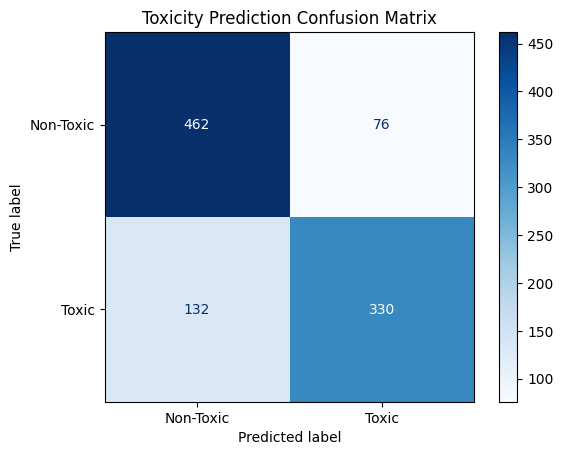

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Non-Toxic", "Toxic"])
disp.plot(cmap=plt.cm.Blues)

plt.title("Toxicity Prediction Confusion Matrix")
plt.show()

True Positive / False Negative

False Positive / True Negative